In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/Elontweets.csv')

In [4]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
print(cdata.dtypes)

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Date      object
Tweets    object
dtype: object


In [5]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [6]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "


C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [7]:
ccdata = pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/Tesla_tweets_old.csv')
ccdata.head(200)

,Unnamed: 0,Date,Tweets
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...
1,1,9/28/2017,kevinroose Just another day in the office Fas...
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...
4,4,9/25/2017,Daimler Good Major improvements some unexpec...
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...
8,17,9/4/2017,SmileSimplify Fun exciting tweets coming soon...
9,18,8/31/2017,Putting together SpaceX rocket landing bloope...


In [8]:
ccdata['Prices']=""

In [9]:
ccdata

,Unnamed: 0,Date,Tweets,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,
1,1,9/28/2017,kevinroose Just another day in the office Fas...,
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,
8,17,9/4/2017,SmileSimplify Fun exciting tweets coming soon...,
9,18,8/31/2017,Putting together SpaceX rocket landing bloope...,


In [10]:
read_stock_p=pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/TESLA_stock_price.csv')
read_stock_p


,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000
5,11/6/2012,31.200001,29.950001,30.610001,31.150000,2324000,31.150000
6,11/7/2012,32.049999,30.809999,31.000000,31.540001,1714500,31.540001
7,11/8/2012,31.879999,30.940001,31.010000,31.309999,1274000,31.309999
8,11/9/2012,30.930000,29.850000,30.600000,30.320000,863000,30.320000
9,11/12/2012,31.420000,30.160000,30.290001,31.070000,555900,31.070000


In [11]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [12]:
cdata

,Date,Tweets
0,2020-07-23,Are we in overbought territory TSLA RSI 65
1,2020-07-23,Ive noticed that every fucker who tags TSLA in...
2,2020-07-23,RT Travisdleslie Tesla could potentially have ...
3,2020-07-23,Tesla bull share price target tsla tsla tesla ...
4,2020-07-23,Next year it will be funny watching the coalro...
5,2020-07-23,NKLA is now at its starting IPO price Wow What...
6,2020-07-23,I am claiming the term Elonsmart to be used to...
7,2020-07-23,MSFT and TSLA beat expectations handsomely and...
8,2020-07-23,RT Travisdleslie Tesla could potentially have ...
9,2020-07-23,Why dont you take it allYoure gonna make it af...


In [13]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [15]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Unnamed: 0,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,341,,,,
1,1,9/28/2017,kevinroose Just another day in the office Fas...,339,,,,
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,340,,,,
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,345,,,,
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,344,,,,
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,344,,,,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,377,,,,
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,362,,,,
8,17,9/4/2017,SmileSimplify Fun exciting tweets coming soon...,362,,,,
9,18,8/31/2017,Putting together SpaceX rocket landing bloope...,355,,,,


In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


% of positive tweets=  69.76320582877959
% of negative tweets=  15.482695810564662


[]

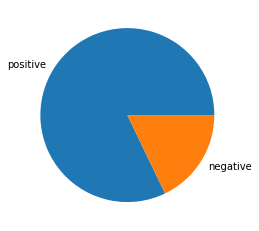

In [18]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [19]:
"""Adding Percent change column in the dataset"""
ccdata['percentchange'] = 0.0000
print(len(ccdata))
for i in range(len(ccdata)-1,0,-1):
    ccdata.at[i-1,'percentchange']=float((ccdata.Prices.iloc[i-1]-ccdata.Prices.iloc[i])/ccdata.Prices.iloc[i-1])

#ccdata['percent change'] = ccdata['percent change'].apply(np.float)
ccdata.head()

549


,Unnamed: 0,Date,Tweets,Prices,Comp,Negative,Neutral,Positive,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,341,0.9705,0,0.846,0.154,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,339,0.8225,0,0.591,0.409,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,340,0,0,1,0,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,345,0.8658,0,0.599,0.401,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,344,0.6369,0,0.729,0.271,0.000000


In [20]:
dataframe=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive','percentchange']].copy()

In [21]:
#Divide data into train and test 
train_data_start = 200
train_data_end = 549
test_data_start = 0
test_data_end = 199
train = dataframe.iloc[train_data_start: train_data_end]
test = dataframe.iloc[test_data_start:test_data_end]

In [22]:
train.head()

,Date,Prices,Comp,Negative,Neutral,Positive,percentchange
200,9/9/2016,194,0.7906,0.063,0.812,0.125,-0.030928
201,9/1/2016,200,-0.2023,0.205,0.795,0,-0.060000
202,8/31/2016,212,0.7906,0,0.887,0.113,0.004717
203,8/30/2016,211,0,0,1,0,-0.018957
204,8/29/2016,215,0.3612,0,0.889,0.111,0.000000


In [23]:
train1 = train.to_numpy()
test1 = test.to_numpy()
numpy_dataframe_train= np.array([x[2:6] for x in train1])

numpy_dataframe_test= np.array([x[2:6] for x in test1])

In [24]:
y_train = pd.DataFrame(train['percentchange'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['percentchange'])

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [26]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, y_train.values.ravel())
prediction_tree, bias, contributions = ti.predict(rf, numpy_dataframe_test)
prediction_rf = rf.predict(numpy_dataframe_test)
rf.score(numpy_dataframe_train,y_train.values.ravel())

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6547070781940924

In [27]:
rf.score(numpy_dataframe_test,y_test)

-1.770538742491508

In [28]:
import matplotlib.pyplot as plt

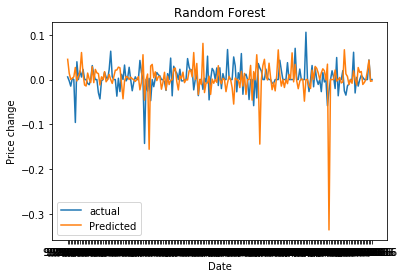

In [29]:
date_test = np.array([x[0] for x in test1])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction_rf, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('Random Forest')
plt.legend()
plt.show()

In [30]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', 
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001)
mlpr.fit(numpy_dataframe_train, train['percentchange'])   
prediction_mlp = mlpr.predict(numpy_dataframe_test)

In [31]:
print(mlpr.score(numpy_dataframe_train, train['Prices']))

-5.977224230961295


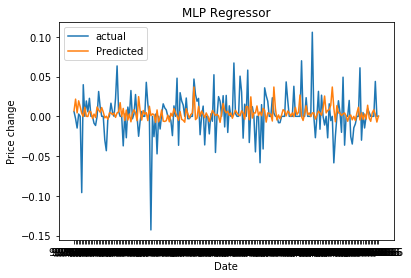

In [32]:
date_test = np.array([x[0] for x in test1])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction_mlp, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('MLP Regressor')
plt.legend()
plt.show()

In [33]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['percentchange'])   
prediction_linear = regr.predict(numpy_dataframe_test)
regr.score(numpy_dataframe_train,y_train)

0.01412891423317908

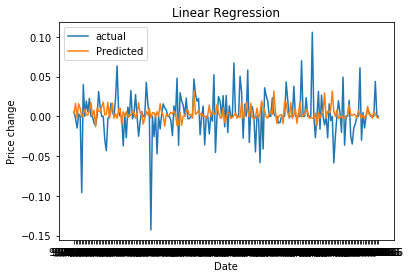

In [34]:
date_test = np.array([x[0] for x in test1])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction_linear, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('Linear Regression')
plt.legend()
plt.show()